## Python 2, CHEM 145

This activity focuses on random number generation, curve fitting. In the experimental labs to come, you will need to fit your data with various curves. This Python activity will introduce you to how to do that and will hopefully reinforce your skills with arrays, plots, and loading data files. You will also fit the solar irradiance spectral data with the blackbody radiation function in order to determine the temperature of the sun. 

# Random Number Generation and Histograms


Let's look how to generate random numbers, starting with simulating the roll of dice. You should study this code, and all the code examples, to try to figure out how they work. Sometimes you may need to look up unfamiliar commands.

In [17]:
import numpy as np
import random

# Let's calculate a bunch of random numbers at a time using the numpy function random.randint.
# np.random.randint(1,7, size=100) will calculate random integers between 1 and 6 (Python expects 
# the number 7, or is one higher than the largest obtainable value 6, to be entered).

print("Random integer values...")
np.random.randint(low=1, high=7, size=100)

Random integer values...


array([4, 3, 3, 1, 1, 6, 4, 3, 4, 3, 3, 1, 4, 3, 4, 4, 5, 1, 1, 6, 3, 3,
       4, 2, 3, 1, 1, 3, 1, 3, 6, 2, 4, 4, 3, 1, 4, 2, 1, 2, 3, 6, 1, 4,
       5, 1, 1, 6, 2, 6, 5, 5, 1, 1, 1, 1, 6, 5, 3, 1, 6, 6, 5, 1, 3, 2,
       5, 4, 4, 6, 6, 6, 3, 1, 3, 3, 2, 4, 1, 4, 5, 2, 1, 6, 6, 3, 5, 2,
       4, 2, 2, 6, 4, 2, 6, 5, 3, 4, 6, 5])

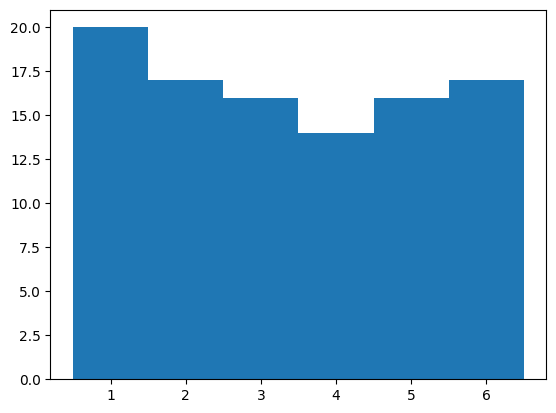

An infinite number of rolls would have a mean of 3.5. With 100 rolls, here, the mean value was 3.4.


In [18]:
# Let's simulate the roll of a fair die many times and then plot the outcome. 
# This uses the module PyLab for its histogram plotting function.

# If you change n_faces to 4 or 10 (for a 4-sided or 10-sided die) you will see the possible outomes changes. If you increase 
# the number of rolls, then you will see the distribution beomce smoother and smoother and also converges toward equal probability 
# for each value. Try it. Note that if you go to a very larger number around 10^9, you may run out of memory on JupyterHub...
# I'm not sure what will happen, but maybe just don't go above 10^7.

import numpy as np
import pylab
import random

n_rolls = 10**2   # number of rolls of a fair die
n_faces = 6    # number of faces on a die, with standard dice having 6 sides

roll_vals = np.random.randint(low=1, high=n_faces+1, size=n_rolls)

# pylab.hist displays a histogram of values for the array rand_ints that contains the die roll values. A histogram shows 
# the distribution of possible values, here with the possible values on the x-axis and the number of occurrences on the 
# y=axis. It should be flat-ish for enough rolls of a fair die. The bins array is a set of values that indicates the 
# boundaries used to group the numbers into distinct bins, here 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5 for a 6-sided die.
bins= np.linspace(0.5,n_faces+0.5,n_faces+1)
pylab.hist(roll_vals, bins)
pylab.show()
print("An infinite number of rolls would have a mean of 3.5. With {}".format(n_rolls) + " rolls, here, the mean value was " + str(np.average(roll_vals)) + ".")

In [19]:
# Let's  see how to calculate one roll of multiple dice.

import numpy as np
import pylab

n_dice = 4     # number of dice
n_faces = 6    # number of faces on a die. standard dice have 6 sides.

roll_val = np.sum(np.random.randint(1, n_faces+1, size=n_dice)) # The function np.sum adds up the values of the different dice.
print("Rolling " + str(n_dice) + " dice with " + str(n_faces) + " faces one time gave a sum of " + str(roll_val) + ".")

Rolling 4 dice with 6 faces one time gave a sum of 15.


**TASK 1:** Plot the distribution observed for 10,000 rolls of 6 fair dice that each have 10 sides that are numbered 1,2,3...10 (the values for 6 dice of this kind range between 6 and 60). Calculate the average value of the histogram. Output a statement "I theoretically expected a mean value of XXX and obtained a mean value of YYY." 

You will see that some of the code has already been written for you. There are a few print statements started in the code. Complete those print statements in order to clearly describe what the provided line(s) of code does. Then finish writing the code by doing the following.

1. Create an array with the bin values. See the examples given above to determine how to do this. 

2. Plot a histogram of the data points

3. Write a print statement indicating the expected and actual mean values for your data.

Here are a few helpful hints for you while coding. You only need to submit the code, though. 
- What mean value would you expect in the limit of the number of rolls going to infinity? What maximum and what minimum values? You can sketch out your expectation and perhaps a few things on paper.
- Initialize an array called roll_vals that has n_rolls (e.g., 10,000) elements in it consisting of zeros using the function np.zeros.
- Write a loop that executes n_rolls (e.g., 10,000) times and writes each roll value into a subsequent element of the array roll_vals.
- Sometimes getting the binning right in a histogram is a little tricky and there are gaps or spikes in a histogram where you don't expect it. Here you probably want to make the bins equal to a series like this 5.5, 6.5, 7.5, ... 58.5, 59.5, 60.5, so you will have to define an array to do that.

If you are curious, try setting the number of dice to 1, 2, and 6 and observe how the distribution shapes are distinctive for each. Make sure the answer you turn in is for 6 fair dice, though.

The above three lines import libs for coding the answers
The above three lines defines the variables we'll use to find answers
The above line defines roll_vals as an array for storing rolls
The above loop is used for adding the summed value for each group of dice rolls to one list


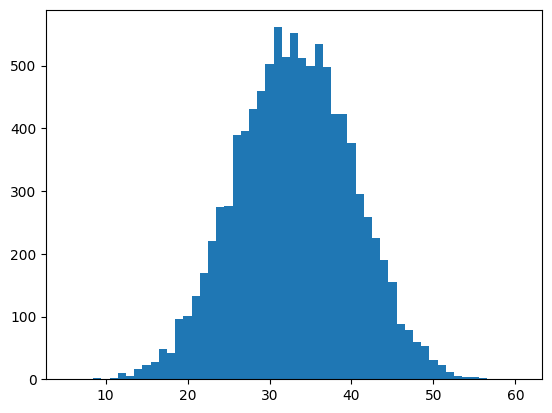

I theoretically expected a mean value of 33 and obtained a mean value of 33.0512.


In [20]:
# TASK 1 SOLUTION
#
# Random number generation for rolling a variable number of dice with variable number of faces.
# Unattributed...and somewhat edited.

import numpy as np
import random # random number generation functions
import pylab # some simple plotting stuff
print("The above three lines import libs for coding the answers")

n_rolls = 10000
n_dice = 6 #should this be a six, not a two?
n_faces = 10;
print("The above three lines defines the variables we'll use to find answers")

# Execute many rolls of the dice and save values in an output array.
roll_vals = np.zeros(n_rolls) # Initialize 1D array where we will put roll values.
print("The above line defines roll_vals as an array for storing rolls");
for i in range(n_rolls): # loop over desired number of rolls of dice
    roll_vals[i] = np.sum(np.random.randint(1, n_faces+1, size=n_dice))

print("The above loop is used for adding the summed value for each group of dice rolls to one list")

# CREATE AN ARRAY WITH THE BIN VALUES. 
bins= np.linspace(5.5,60.5,55+1) #gotta be 55 because 60.5-5.5 = 55 haha I remember that from P1

# PLOT A HISTOGRAM OF THE DATA POINTS.
pylab.hist(roll_vals, bins)
pylab.show()
# WRITE A PRINT STATEMENT INDICATING THE EXPECTED AND ACTUAL MEAN VALUES FOR YOUR DATA.
print(f"I theoretically expected a mean value of 33 and obtained a mean value of {str(np.mean(roll_vals))}.")


      

# Curve Fitting
Sometimes you have a distribution and want to find the best fit of a function to the data in order to determine some key parameters from the function (e.g., decay constant). You have probably done this before by fitting a line to some data points. Let's see an example of how to do that for an exponential function. Later you will try it with other functions. 

An exponential function is given by $ \large f(x) = Ce^{Dx} $. You will add some random noise to that and then fit the simulated noisy exponential function to see if you can recover the parameters $C$ and $D$.

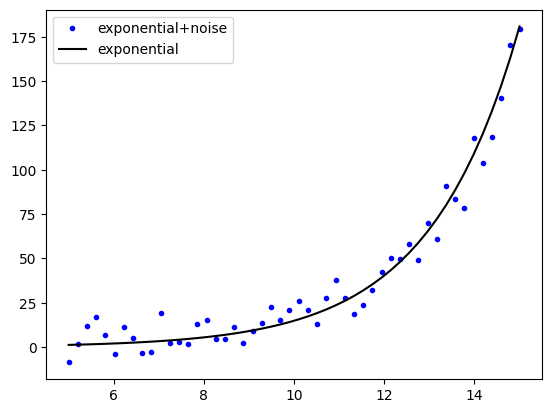

In [21]:
# EXPONENTIAL FITTING EXAMPLE
# ADAPTED FROM: https://towardsdatascience.com/basic-curve-fitting-of-scientific-data-with-python-9592244a2509
# See that page for a nice explanation, as well.
# This example code uses the SciPy library of scientific computing tools, here for its curve fitting routines.

from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Define an exponential function with inputs x (for the input values), c (for "height" at x=0), and d (for "rate constant").
def exponential(x, c, d):
    return c*np.exp(d*x)

# Evaluate the exponential function for some input values.
x = np.linspace(5, 15, 50) # Input array of x-values.
y_exp = exponential(x, 0.1, 0.5)

# Add a bit of noise from a Gaussian (a.k.a., bell curve) distribution to simulate a noisy measurement.
noise_ctr = 0 # Noise should have an average value of this (0 for noise that is equally likely to shift the data up or down).
noise_std = 10 # This is the standard deviation of the noise...it controls how much noise is added.
noise = np.random.normal(noise_ctr,noise_std,np.size(y_exp)) # The function np.random.normal returns an array of random numbers that have a "normal" distribution.
y_exp_noisy = y_exp + noise

# Plot the exponential with and without noise. Try uncommenting the last line to see that an exponential function looks like a line when 
# the y-axis is plotted logarithmically.
ax = plt.axes()
ax.plot(x, y_exp_noisy, 'b.', label='exponential+noise')   # The '.' command tells the plot to show points. You could use '.-' for points with lines or '-' for lines, etc.
ax.plot(x,y_exp,'k',label='exponential')
legend = ax.legend(loc='upper left')                      # Add a legend. Note that the legend labels are included in each plot command, above.
#ax.set_yscale('log')                                     # An exponential becomes a line on a semilog-y plot.




Exponential fit parameters [height rate] = [0.12762689 0.48083306]


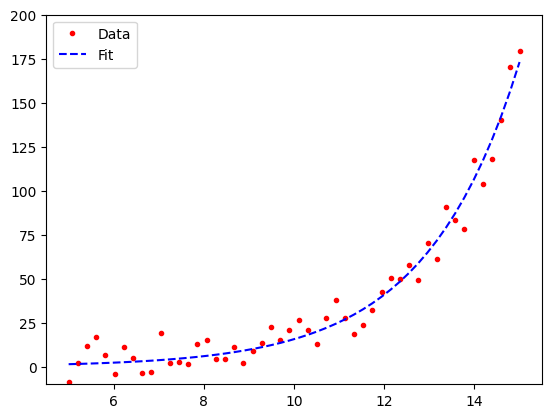

In [22]:
# Continuing from above... Let's fit the noisy exponential data to an exponential function. The function curve_fit, below, has several inputs. 
# f = exponential is a function that you need to define that has the independent variable x inputted first, and then the function parameters next.
# xdata = x are the x values of the data to be fit.
# ydata = y_exp_noisy are the y values of the data to be fit. 

pars, cov = curve_fit(f=exponential, xdata=x, ydata=y_exp_noisy, p0=[0, 0], bounds=(-np.inf, np.inf))
# pars are the fitted parameter values returned by the curve fitting routine, with pars[0]=a and pars[1]=b.
# cov is the covariance matrix that we are just going to ignore.

print("Exponential fit parameters [height rate] =" , str(pars))

# Plot the noisy exponential data.
ax = plt.axes()
ax.plot(x, y_exp_noisy, 'r.', label='Data')                            # Plot the data as points.                                                                 
ax.plot(x, exponential(x, *pars), 'b--', label='Fit') # Plot the fit data as an overlay on the scatter data
plt.ylim(-10,200);                                                                         # Specify the range of the y-axis for making a nice plot.
legend = ax.legend(loc='upper left')   # Add a legend.


**TASK 2:** Students are sometimes taught to fit exponential curves by converting them to a line and then using a line-fitting routine. That can be a useful "quick and dirty" strategy, but it can be quite a bit less accurate than fitting an exponential as an exponential. In this task, you will test how good of a job a line fit to the log of an exponential does compared to the "more proper" apporoach demonstrated above. 

First, on paper (no need to submit) show that an exponential function of the form $\large y=Ce^{Dx}$ can be "linearized" by taking the natural logarithm of each side to give $\large \ln{y}=\ln{C} + Dx$.

Second, sometimes an exponential function may have zero or negative data due to noise that is intrinsic to the measurements, but the logarithm of zero or a negative number is undefined. A quick way around that is to define new arrays where the elements that are zero or negative are just omitted from the data. You will see this has already been done for you. Use print statements, like in Task 1, to clearly annotate the first four lines of code to demonstrate your understanding.

Third, define a custom function called **line** for a line in slope-intercept form $\large y = mx + b$.

Fourth, do a line fit with your x2, yl2 data. The output parameters are for slope and y-intercept. Have Python print a statement saying "Exponential fit parameters [height rate] = XXX YYY."

Lastly, you should run the whole routine a few times (2-3x, as the noise will be different for each trial). If different pieces of the code are in different cells, then you should execute the cells sequentially. Just show your data from the last trial but do add a print statement indicating which routine produced results closest to the truth.

If you are curious, consider in a different cell plotting *y_exp_noisy* together with the exponential you would obtain using the parameters from your linearized fit (you need to exponentiate the y-intercept term $b$). It will often be a close-ish fit but not great.

The previous line adds everything from y_exp_noisy less than or equal to zero to inds as an array
The previous line removes all numbers in inds from y_exp_noisy2, getting rid of numbers <= 0.
The previous line also deletes numbers less than or equal to zero for the x axis.
The previous line takes the numbers from the last y-axis array and logs them.

Exponential fit parameters [height rate] =[ 0.38093318 -0.85655831].


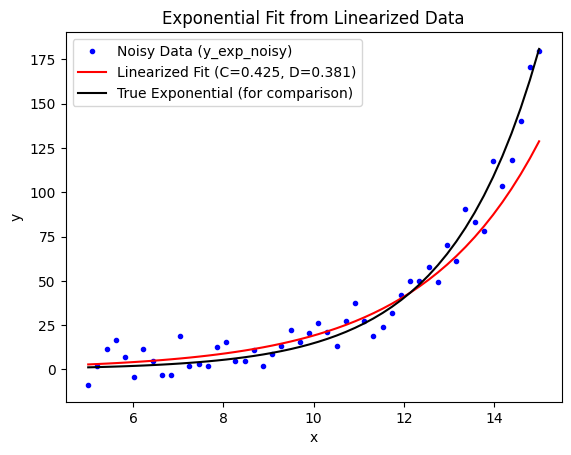

In [23]:
# TASK 2 SOLUTION
#
# The scipy curve_fit library is not the end of the conversation about curve fitting. 
# There are many ways to do it and lots of details to think about beyond what is covered here.

inds = np.argwhere(np.less_equal(y_exp_noisy,0))
print("The previous line adds everything from y_exp_noisy less than or equal to zero to inds as an array")

y_exp_noisy2 = np.delete(y_exp_noisy,inds)
print("The previous line removes all numbers in inds from y_exp_noisy2, getting rid of numbers <= 0.")

x2 = np.delete(x,inds)
print("The previous line also deletes numbers less than or equal to zero for the x axis.")

yl2 = np.log(y_exp_noisy2)
print("The previous line takes the numbers from the last y-axis array and logs them.")
print()

# DEFINE A LINE FUNCTION HERE.
def line(m,x,b):
    return m*x + b

# FIT YOUR CURVE TO THE LINEAR FUNCTION HERE.
mb,error =curve_fit(f=line,xdata=x2,ydata=yl2,p0=[0,0],bounds=(-np.inf, np.inf)) #curve_fit is returning the now calculated constants from the previously defined funciton line using the arrays x2 and yl2


# PULL OUT THE SLOPE AND Y-INTERCEPT OF YOUR LINEAR FIT HERE.
slope = mb[0] #m would be stored first and then b because of their order in line's definition.
y_intercept = mb[1]

# THE LINE SLOPE IS THE SAME AS THE EXPONENTIAL RATE CONSTANT. THE LINE FIT'S Y-INTERCEPT TERM IS THE SAME AS THE NATURAL LOG OF THE HEIGHT. 
# KEEP THESE IN MIND AS YOU MOVE FORWARD AND COMPARE TO THE EXPONENTIAL FIT.

# PRINT YOUR LINE FITTING PARAMETERS HERE.
print("Exponential fit parameters [height rate] =" + str(mb) +".")


# PLOT YOUR FUNCTION HERE.

C = np.exp(y_intercept) #ln(C) = b so e^ln(C) = C
D = slope #it's just direct conversion

y_array = exponential(x,C,D) # this is the exponential graph containing the chaotic data we've linearized

#these two are used for plotting things on one graph together?
plt.figure() 
ax = plt.axes()
ax.plot(x, y_exp_noisy, 'b.', label='Noisy Data (y_exp_noisy)') #these are the points
ax.plot(x, y_array, 'r-', label=f'Linearized Fit (C={C:.3f}, D={D:.3f})') # this is the linearized estimation using our 50 chaotic points
ax.plot(x, y_exp, 'k', label='True Exponential (for comparison)') #this is the original true data with the correct C and D values

# Everything beneath this is just for cleanup of the graph
plt.title('Exponential Fit from Linearized Data')
plt.xlabel('x')
plt.ylabel('y')
ax.legend()
plt.show()

Gaussian fit parameters [height center std] = [ 4.05696705 -1.95124191  1.9169418 ]


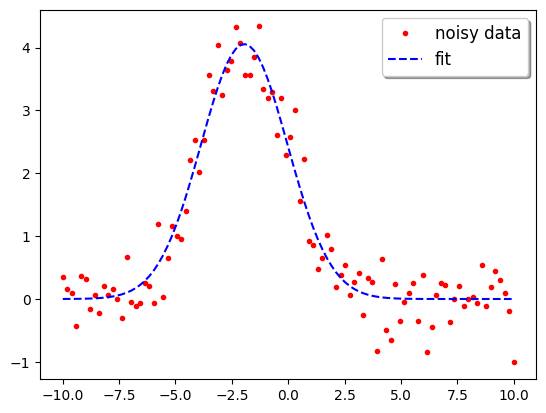

In [24]:
# GAUSSIAN FITTING EXAMPLE
# ADAPTED FROM: https://towardsdatascience.com/basic-curve-fitting-of-scientific-data-with-python-9592244a2509
# This is a second example you can use to see how curve fitting works. It will be useful for the next task.

from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Define a function to calculate the Gaussian with constants a (peak height), b (center position), and c (standard deviation--width parameter). 
def gaussian(x, a, b, c):
    return a*np.exp(-((x-b)**2)/(2*c**2))

# Define a vector of evenly spaced numbers for the x-coordinate values.
x = np.linspace(start=-10, stop=10, num=100)

# Define a vecetor of the y-values of the Gaussian without noise.
g = gaussian(x, 4, -2, 2)

# Add noise from a Gaussian distribution
noise_ctr = 0     # Noise should have an average value of this (0 for noise that is equally likely to shift a value up or down).
noise_std = 0.4   # This is the standard deviation of the noise.
noise = np.random.normal(noise_ctr,noise_std,g.size) # The function np.random.normal returns an array of random numbers that have a "normal" distribution.
g_noisy = g + noise

# Fit the Gaussian data
pars, cov = curve_fit(f=gaussian, xdata=x, ydata=g_noisy, p0=[3, 3, 3], bounds=(-np.inf, np.inf)) # Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
# pars are the fitted parameter values returned by the curve fitting routine.
print("Gaussian fit parameters [height center std] =" , str(pars))

# Plot the fit together with the original data.
ax = plt.axes()
ax.plot(x,g_noisy, 'r.',label='noisy data')
ax.plot(x,gaussian(x, *pars), 'b--',label='fit')

# Add a legend.
legend = ax.legend(loc='upper right', shadow=True, fontsize='large')

**TASK 3:** Try simulating and then doing a curve fit with the second order decay function specified by the equation below.
- Use a=1, b=1, c=2 for the simulation.
- For the array t, use an array of 32 points evenly spaced from 0 to 10. Add to that equation Gaussian random noise centered at 0 and with a standard deviation of 0.05.
- Perform the curve fit on the noisy data.
- Create a figure showing a plot of the noiseless data as a black line together with the noisy data as red dots and the data fit as green "x" symbols. Include a legend, label the x-axis ("time [s]") and y-axis ("amplitude [arb.]").
- Have Python print out a statement of what the fit parameters are. Experiment a bit with the random noise to see how well or bad the fit is and how close the returned parameters are to the input parameters a, b, c.

$$ \Large f(t) = \frac{a}{b+ct} $$

B/c noise is random around our real data, it should approximate an average of it, meaning it's average should have a 0 net change from the actual curve
This is the standard deviation of the noise, it defines how far appart the noise dots should be
np.random.normal returns an array (specific type of np. python tool) of random numbers that have a 'normal' distribution.
what should print here is 32 numbers (b/c of f.size) all between a range of the decay curve +/- 0.4. remove the # on the line under this to see if I'm right
Decay fit parameters are [a,b,c] = 3.4840 3.5330 7.0869


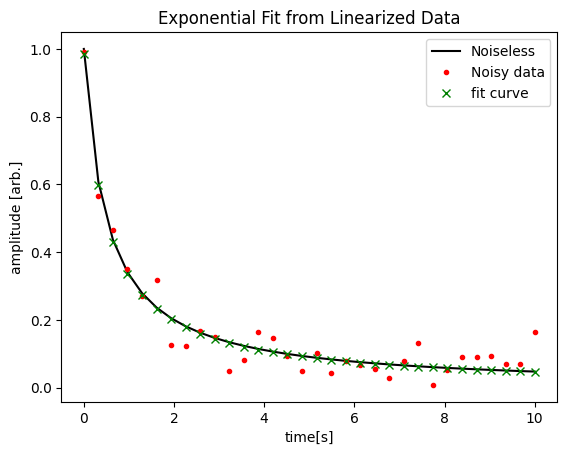

In [1]:
# TASK 3 SOLUTION

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# DEFINE THE FUNCTION FOR THE SECOND ORDER DECAY
def decay (x, a, b, c):
    return a/(b+c*x)

# DEFINE YOUR INPUT PARAMETERS, SUCH AS YOUR a, b, c, NUMBER OF POINTS n_pts, THE ARRAY OF T VALUES t, AND THE SOLUTION F(T) WHICH YOU CAN CALL 'y'.
n_pts = 32
t = np.linspace(0,10,n_pts)
y = decay (x = t, a=1, b=1, c=2)

# CREATE NOISE AS YOU HAVE SEEN BEFORE, AND ADD IT TO CREATE A "NOISY" VERSION OF YOUR ORIGINAL FUNCTION F(T). 
# ADD PRINT STATEMENTS ANNOTATING THIS BLOCK OF CODE TO DEMONSTRATE YOUR UNDERSTANDING OF EACH STEP
print("B/c noise is random around our real data, it should approximate an average of it, meaning it's average should have a 0 net change from the actual curve")
noise_ctr = 0

print("This is the standard deviation of the noise, it defines how far appart the noise dots should be")
noise_std = 0.05

print("np.random.normal returns an array (specific type of np. python tool) of random numbers that have a 'normal' distribution.")
noise = np.random.normal(noise_ctr,noise_std,t.size) 

print("what should print here is 32 numbers (b/c of f.size) all between a range of the decay curve +/- 0.4. remove the # on the line under this to see if I'm right")
y_noisy = y + noise
#print(y_noisy) #proof

# FIT YOUR CURVE AS YOU HAVE DONE BEFORE, AND PRINT YOUR FIT PARAMETERS.
#There's no negatives so there's no need to account for their removal
pars, cov = curve_fit(f=decay, xdata=t, ydata=y_noisy, bounds=(0, 10)) # p0=[3, 3, 3] I'm omitting the p0 because decay returns those a,b,c in order because of how I coded it originally


# EVALUATE THE FITTED CURVE
a_fit = pars[0]
b_fit = pars[1]
c_fit = pars[2]
y_noisy_fit = decay(a=a_fit,b=b_fit,c=c_fit,x=t)
print(f'Decay fit parameters are [a,b,c] = {a_fit:.4f} {b_fit:.4f} {c_fit:.4f}')
# PLOT YOUR FITTED CURVE TOGETHER WITH THE ORIGINAL DATA.

plt.figure() 
ax = plt.axes()
ax.plot(t, y, 'k', label='Noiseless') #these are the points
ax.plot(t, y_noisy, 'r.', label='Noisy data') # this is the linearized estimation using our 50 chaotic points
ax.plot(t, y_noisy_fit, 'gx', label='fit curve') #this is the original true data with the correct C and D values

# Everything beneath this is just for cleanup of the graph
plt.title('Exponential Fit from Linearized Data')
plt.xlabel('time[s]')
plt.ylabel('amplitude [arb.]')
ax.legend()
plt.show()


**Bounds and Initial Guesses**

The curve fitting examples above were all pretty "easy". You might not have thought much about it, but the bounds were really wide open, and the initial guesses weren't very close at all. When fitting curves to data, it is often necessary to provide careful initial guesses and to constrain the range of parameters. 

Execute the cell below ("TWO GAUSSIANS PLUS NOISE") which generates a signal with two gaussians overlaid with noise. 

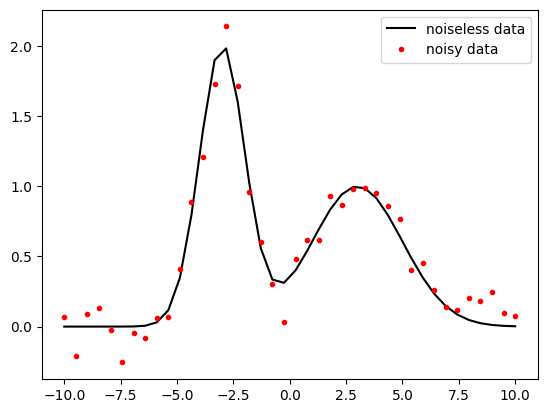

In [26]:
# TWO GAUSSIANS PLUS NOISE
#
# This generates some sample data for you the next task.

from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Define a function to calculate the Gaussian with constants a (peak height), b (center position), and c (standard deviation--width parameter). 
def dbgaussian(x, a1, b1, c1, a2, b2, c2):
    return a1*np.exp(-((x-b1)**2)/(2*c1**2)) + a2*np.exp(-((x-b2)**2)/(2*c2**2))

# Define a vector of evenly spaced numbers for the x-coordinate values.
x = np.linspace(start=-10, stop=10, num=40)

a1 = 1
b1 = 3
c1 = 2
a2 = 2
b2 = -b1
c2 = 1

# Define a vecetor of the y-values of the Gaussian without noise.
dbg = dbgaussian(x, a1, b1, c1, a2, b2, c2)

# Add noise from a Gaussian distribution
noise_ctr = 0     # Noise should have an average value of this (0 for noise that is equally likely to shift a value up or down).
noise_std = 0.10  # This is the standard deviation of the noise.
noise = np.random.normal(noise_ctr,noise_std,dbg.size) # The function np.random.normal returns an array of random numbers that have a "normal" distribution.
dbg_noisy = dbg + noise

# Plot the noiseless and noisy data.
ax = plt.axes()
ax.plot(x,dbg, 'k',label='noiseless data')
ax.plot(x,dbg_noisy, 'r.',label='noisy data')
ax.legend(loc="upper right")

**TASK 4:** Adjusting initial guess or paramter bounds. Try running the code in TASK 4A-B as it starts out. Does it return a good fit or even run without an error? This activity assumes the previous cell was executed and is in memory.

A) Adjust the lower and upper bounds to possible paramters. For instnace, assume that the original gaussians are known to be positive signals so the heights must be greater than zero. You could constrain the centers to be somewhere in the region of the simulation. You could come up with a good lower bound for the standard deviations. 

B) Try adjusting the initial guesses in the cell below and see what happens. Try starting by adjusting the standard deviations away from zero. Does that fix the problem? If not, then try adjusting some other paramters to see if it helps. Then try adjusting the initial guesses to see if you can get a feeling for what makes the system fail or not. Pay attention to whether the output parameters from the successful fit are the same as you adjust the initial parameters.

C) Look on Canvas at Files\Python\Python 1 to find a list of sample data files that are named "double_gaussianX.txt" where X is a number between 0 and 9. Identify and analyze the file with the number corresponding to the last digit of your student number. For your analysis, write code in a new cell that can load the data, fit the two gaussians, print out the fit parameters, and create a plot showing the original data together with the fitted gaussian.

Fit parameters= [ 2.00354935 -2.95576892  0.98863051  1.00529946  3.14613116  2.04499176]


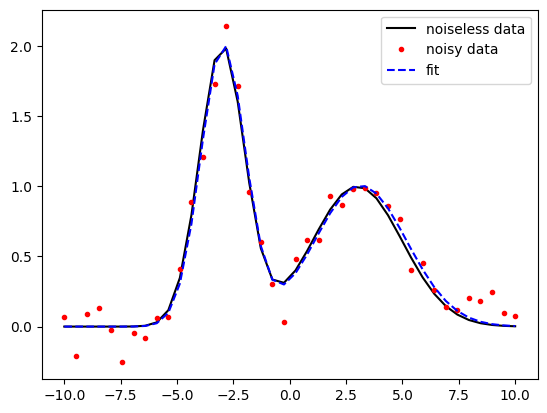

In [27]:
# TASK 4A-B 

# Fit the data. This time, use lower/upper bounds for each parameter. You will probably get an error initially.

# Initial guesses for a1, b1, c1, a2, b2, c2. You might need to adjust these.
init = [2, -2.5, .5, 1, 2.5, 1]

# You might need to adjust these.
lbnds = np.array([0,  -np.inf,  -np.inf,  0,  -np.inf,  -np.inf]) # lower bounds for the parameters
ubnds = np.array([10,  10,  10,  10,  10,  10]) # upper bounds for the parameters

# Curve fitting is here.
pars, cov = curve_fit(f=dbgaussian, xdata=x, ydata=dbg_noisy, p0=init, bounds=(lbnds,ubnds))

print("Fit parameters=" , str(pars))

# Plot the data.
ax = plt.axes()
ax.plot(x,dbg, 'k',label='noiseless data')
ax.plot(x,dbg_noisy, 'r.',label='noisy data')
ax.plot(x,dbgaussian(x, *pars), 'b--',label='fit')
legend = ax.legend(loc='upper right')

Fit parameters:[  7.6743497  285.25185065 107.41714956  11.31911323 634.60248443
 109.56764674]


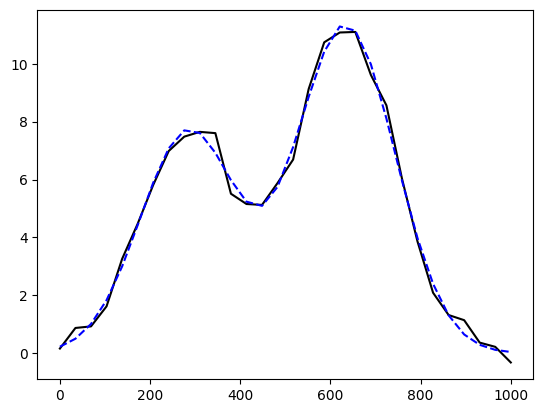

In [28]:
# TASK 4C SOLUTION
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def dbgaussian(x, a1, b1, c1, a2, b2, c2):
    return a1*np.exp(-((x-b1)**2)/(2*c1**2)) + a2*np.exp(-((x-b2)**2)/(2*c2**2))

data = np.loadtxt('double_gaussian3.txt')
x_3, y_3 = data[:, 0], data[:, 1]

plt.figure()
ax = plt.axes()
ax.plot(x_3,y_3,'k',label='TrueData');

Guess = [4,300,200,6,600,50] #my god this took a while to get
lbnds_3 = np.array([0,  -np.inf,  -np.inf,  0,  -np.inf,  -np.inf]) 
ubnds_3 = np.array([np.inf, np.inf, np.inf, np.inf, np.inf,  np.inf]) 

pars, cov = curve_fit(f=dbgaussian, xdata=x_3, ydata=y_3, p0=Guess, bounds=(lbnds_3,ubnds_3))
print('Fit parameters:' + str(pars))

ax.plot(x_3,dbgaussian(x_3, *pars), 'b--',label='fit');


# Load data, fit to two gaussians, and plot.

**TASK 5:** Download the solar irradiance spectrum "sun_irradiance.txt" from Canvas File \ Python \ Python2 and fit the blackbody wavelength irradiance equation, below, in order to determine the temperature of the sun. 

Here are a few notes. 

First, the data file contains two columns. The first column is wavelength in units of micrometers. It is advised that after you extract that column in Python as your wavelength array you should convert to units of meters by multiplying by $10^{-6}$. SI units are convenient here, but when in doubt about units, write it out on paper and make sure they all cancel out as expected. The second column is spectral irradiance in units of $W/\mu m^2$. After you extract that column in Python as your spectral radiance that you convert it to units of ${W/m^2}$ by multiplying it by $10^{12}$.

Second, use the equation $B(\lambda,T)$, below, which is written as a function of wavelength $\lambda$ rather than equation shown in Oxtoby which is a function of frequency $\nu$. The unitless factor $A$ has been incorporated into the equation, below, as a "fudge factor" that allows the amplitude of the fit to better match that of the spectrum. There are only two free parameters, $A$ and $T$. $h$ is Planck's constant, $k_B$ is Boltzmann's constant, $\lambda$ is wavelength, $c$ is the speed of light in a vacuum, and $e$ is the base of the natural logarithm.

Third, you can define the constants $c$, $k_B$, and $h$ within your custom function. 

$$ \large B(\lambda,T) = A\frac{2hc^2}{\lambda^5}\frac{1}{e^{\frac{hc}{\lambda k_BT}}-1}$$

The data file "sun_irradiance.txt" is the "ASTM Standard Extraterrestrial Spectrum Reference E-490-00" from the URL, below, and shows the spectral radiance of the sun as a function of wavelength when measured outside the atmosphere of the earth.
https://www.nrel.gov/grid/solar-resource/spectra-astm-e490.html

The Energy of the sun is approximately: 5507K.


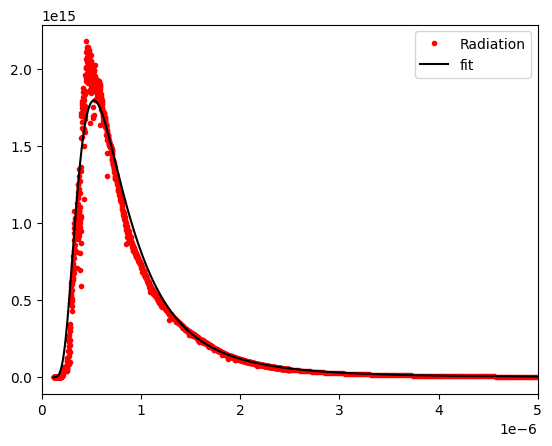

In [29]:
# TASK 5 SOLUTION
# Load data, fit to blackbody radiation curve to find the temperature, and plot result.
# B = irradiance, h=plancks, lambda = x = wavelengths, k = plank's constant, T = temperature(solving for this), c= speedofL

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = np.loadtxt('sun_irradiance(1).txt')
Wvl_array = data[:,0] # array of wavelengths
Rad_array = data[:,1] # array of irradiance B
Wvl_array_m = Wvl_array*1e-6
Rad_array_m = Rad_array*1e12

h = 6.62607015e-34
c = 299792458
k = 1.380649e-23

def Blackbody (x,A,T):
    return A*((2*h*c**2)/(x**5))*(1/(np.exp(h*c/(x*k*T))-1))

Guess_S = [1e-6,5700]
lbnds_S = np.array([-np.inf,0])
ubnds_S = np.array([np.inf,10000])

pars, cov = curve_fit(f=Blackbody, xdata=Wvl_array_m, ydata=Rad_array_m, p0=Guess_S, bounds=(lbnds_S,ubnds_S))

print(f"The Energy of the sun is approximately: {pars[1]:.0f}K.")

ax = plt.axes()

ax.plot(Wvl_array_m, Rad_array_m, 'r.', label = 'Radiation');
ax.plot(Wvl_array_m, Blackbody(Wvl_array_m, *pars), 'k', label= 'fit');
plt.xlim(0,5e-6)
plt.legend();

**Submitting this assignment.** Go to File \ Save and Export Notebook As... \ HTML. Then submit the HTML file to the Python assignment in Canvas.